Importing the Dependecies

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing Data

In [13]:
house_price_dataset = fetch_california_housing()

In [14]:
print (house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [25]:
#Loading the data as Pandas Dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns = house_price_dataset.feature_names)

In [27]:
#print first 5 rows
house_price_dataframe.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [33]:
#add target column(house price) to Dataframe
house_price_dataframe['Price'] = house_price_dataset.target

In [38]:
#print first 5 rows including price Column
house_price_dataframe.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [42]:
house_price_dataframe = house_price_dataframe.drop(columns = 'target', axis = 1)

In [47]:
#chekcing number of rows and columns in Data Frame
house_price_dataframe.shape

(20640, 9)

In [48]:
#check for missiong values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [49]:
#get statistical measures of DataSet
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding hte correlation between various features in Dataset

1.   Positive Correlation
2.   Negative Correlation


In [50]:
correlation = house_price_dataframe.corr()

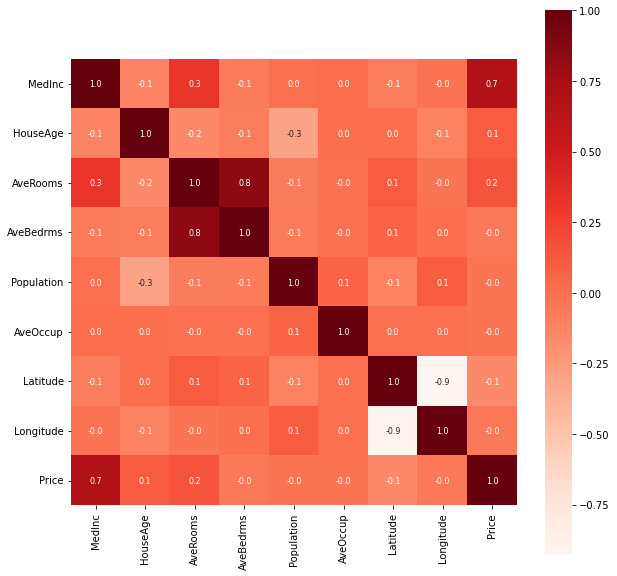

In [69]:
#constructing heat map to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws= {'size':8}, cmap='Reds')

Splitting the Data and Target(Price) #Data and Label Split

In [73]:
X = house_price_dataframe.drop(['Price'], axis=1)
Y = house_price_dataframe['Price']

In [101]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Spliting Dat ainto Train and Test Data

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [103]:
print (X.shape,X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training


XGBoost Rergessor (because of small Dataset)

In [104]:
#loading the model
model = XGBRegressor()

In [105]:
#Training model with X_train
model.fit (X_train, Y_train)

[12:05:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

Prediction on Training Data

In [106]:
#accuracy for prediction on training Data      #find Rsquruare etc #cannot use accuracy score for regression problems
training_data_prediction = model.predict(X_train)

In [107]:
print (training_data_prediction)

[0.5106896 3.259647  0.7520858 ... 1.6448892 1.7609202 0.8609372]


In [108]:
#R square error - regresison probem
score_1 = metrics.r2_score(Y_train, training_data_prediction)

#mean absolute error - regresison probem
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print ('R squared error:', score_1)   #should be close to zero not large as 10
print ('Mean absolute errorr:', score_2)  #should be close to zero not large as 10

R squared error: 0.8040717007536332
Mean absolute errorr: 0.3567039052104632


Prediction on Test Data

In [109]:
#accuracy for prediction on test Data      #find Rsquruare etc #cannot use accuracy score for regression problems
testing_data_prediction = model.predict(X_test)

In [110]:
#R square error - regresison probem
score_1 = metrics.r2_score(Y_test, testing_data_prediction)

#mean absolute error - regresison probem
score_2 = metrics.mean_absolute_error(Y_test, testing_data_prediction)

print ('R squared error:', score_1)   #should be close to zero not large as 10
print ('Mean absolute errorr:', score_2)  #should be close to zero not large as 10

R squared error: 0.7827492630044839
Mean absolute errorr: 0.368917494311536


Visulaze the actual prices and the Predicted Prices

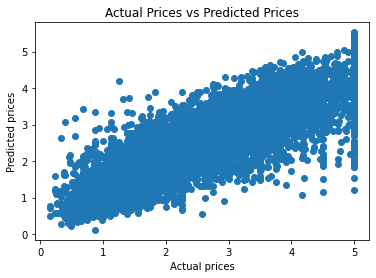

In [111]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Making a Predictive sytem on house price

In [112]:
input_data = (0,8.3252,41.0,6.984126984126984,1.0238095238095237,322.0,2.5555555555555554,37.88,-122.23)

#change input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print ('The person is not diabetic')
else:
  print('The person is diabetic')

NameError: ignored